In [3]:
# Import dependencies
import pandas as pd
import matplotlib as pyplot
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [4]:
# Reference csv file paths

final_path = "Data/book_to_film_adaptations.csv"

In [5]:
# Import csv files as DataFrames

# Data
final_df = pd.read_csv(final_path, encoding="utf-8")

final_df.head(3)


Unnamed: 0  index     id  \
0           0      0   4584   
1           1      6  10533   
2           2     18  19101   

                                            keywords  adult    budget genres  \
0  [{'id': 420, 'name': 'bowling'}, {'id': 818, '...  False  16500000  Drama   
1  [{'id': 818, 'name': 'based on novel'}, {'id':...  False  50000000  Drama   
2  [{'id': 818, 'name': 'based on novel'}, {'id':...  False  17000000  Drama   

     imdb_id original_language         original_title  ...  \
0  tt0114388                en  Sense and Sensibility  ...   
1  tt0114345                en     The Scarlet Letter  ...   
2  tt0113670                en      A Little Princess  ...   

                   title  movieId  imdbId rating  \
0  Sense and Sensibility       17  114388   3.95   
1     The Scarlet Letter      191  114345   2.69   
2      A Little Princess      262  113670   3.76   

                                            authors average_rating  \
0                    Jane Austen/Claudia L. Johnson           4.07   
1  Nathaniel Hawthorne/Thomas E. Connolly/Nina Baym           3.40   
2                Frances Hodgson Burnett/Nancy Bond           4.20   

     num_pages  ratings_count               publisher sum_of_ratings  
0          269            768  W. W. Norton & Company           1773  
1          279         609586           Penguin Books          11030  
2          242         238192           Penguin Books          14769  

[3 rows x 25 columns]

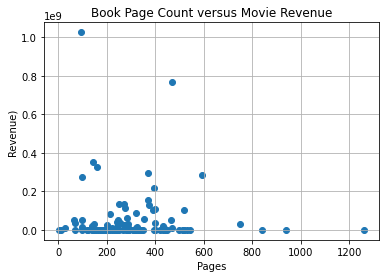

In [6]:
#page count versus movie revenue plot

plt.scatter(final_df["  num_pages"], final_df["revenue"], marker="o")

# Incorporate the other graph properties
plt.title("Book Page Count versus Movie Revenue")
plt.ylabel("Revenue)")
plt.xlabel("Pages")
plt.grid(True)

# Save the figure
plt.savefig("page_count_revenue.png")

# Show plot
plt.show()


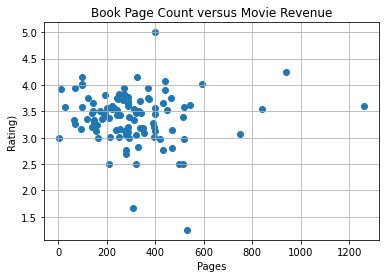

In [7]:
#page count versus movie rating plot

plt.scatter(final_df["  num_pages"], final_df["rating"], marker="o")

# Incorporate the other graph properties
plt.title("Book Page Count versus Movie Revenue")
plt.ylabel("Rating)")
plt.xlabel("Pages")
plt.grid(True)

# Save the figure
plt.savefig("page_count_rating.png")

# Show plot
plt.show()

In [8]:
#genre versus movie revenue plot

grouped_df = final_df.groupby('genres').sum('revenue').reset_index()
grouped_df = grouped_df[(grouped_df.T != 0).any()]

#grouped_df

new_grouped = grouped_df[['genres', 'revenue']]

#drop 0 values from revenue

new_grouped


genres     revenue
0            Action   141991950
1         Adventure   217420575
2         Animation   332893781
3            Comedy    85355959
4             Crime   492186318
5             Drama  1735881395
6            Family  1025491110
7           Fantasy   339356087
8            Horror    56012189
9           Mystery    95852656
10          Romance     1548955
11  Science Fiction           0
12         TV Movie           0
13         Thriller  1022108282

<AxesSubplot:xlabel='genres'>

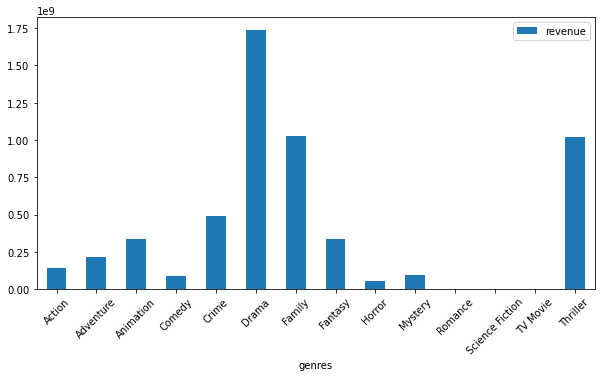

In [9]:
new_grouped.plot('genres', 'revenue', kind='bar', figsize=(10,5), rot=45)

In [10]:
#scatter plots of top genres versus revenues


In [17]:
#drama genre scatter with revenue
#get only rows that contain 'drama'

drama_df = final_df[final_df['genres'] == 'Drama']

drama_df.head()


Unnamed: 0  index     id  \
0           0      0   4584   
1           1      6  10533   
2           2     18  19101   
4           4     22  11236   
7           7     32    627   

                                            keywords  adult    budget genres  \
0  [{'id': 420, 'name': 'bowling'}, {'id': 818, '...  False  16500000  Drama   
1  [{'id': 818, 'name': 'based on novel'}, {'id':...  False  50000000  Drama   
2  [{'id': 818, 'name': 'based on novel'}, {'id':...  False  17000000  Drama   
4  [{'id': 818, 'name': 'based on novel'}, {'id':...  False         0  Drama   
7  [{'id': 212, 'name': 'london england'}, {'id':...  False   4000000  Drama   

     imdb_id original_language         original_title  ...  \
0  tt0114388                en  Sense and Sensibility  ...   
1  tt0114345                en     The Scarlet Letter  ...   
2  tt0113670                en      A Little Princess  ...   
4  tt0108071                en      The Secret Garden  ...   
7  tt0117951                en          Trainspotting  ...   

                   title  movieId  imdbId rating  \
0  Sense and Sensibility       17  114388   3.95   
1     The Scarlet Letter      191  114345   2.69   
2      A Little Princess      262  113670   3.76   
4      The Secret Garden      531  108071   3.50   
7          Trainspotting      778  117951   4.01   

                                            authors average_rating  \
0                    Jane Austen/Claudia L. Johnson           4.07   
1  Nathaniel Hawthorne/Thomas E. Connolly/Nina Baym           3.40   
2                Frances Hodgson Burnett/Nancy Bond           4.20   
4                           Frances Hodgson Burnett           4.13   
7                                      Murray Smith           4.03   

     num_pages  ratings_count               publisher sum_of_ratings  
0          269            768  W. W. Norton & Company           1773  
1          279         609586           Penguin Books          11030  
2          242         238192           Penguin Books          14769  
4          331         764134     Children's Classics          70604  
7           96             75  British Film Institute         555995  

[5 rows x 25 columns]

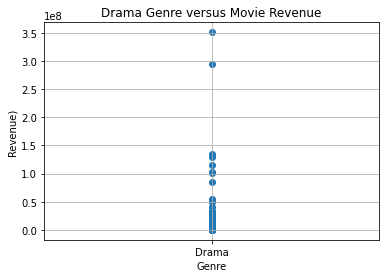

In [21]:
#scatter plot it

plt.scatter(drama_df["genres"], drama_df["revenue"], marker="o")

# Incorporate the other graph properties
plt.title("Drama Genre versus Movie Revenue")
plt.ylabel("Revenue)")
plt.xlabel("Genre")
plt.grid(True)

# Save the figure
plt.savefig("drama_revenue.png")

# Show plot
plt.show()

In [18]:
#family genre scatter with revenue

#get only rows that contain 'thriller'

thriller_df = final_df[final_df['genres'] == 'Thriller']

thriller_df


Unnamed: 0  index      id  \
26           26     66    1359   
49           49    129     591   
100         100    238  207932   

                                              keywords  adult     budget  \
26   [{'id': 818, 'name': 'based on novel'}, {'id':...  False    7000000   
49   [{'id': 90, 'name': 'paris'}, {'id': 113, 'nam...  False  125000000   
100  [{'id': 131, 'name': 'italy'}, {'id': 818, 'na...  False   75000000   

       genres    imdb_id original_language     original_title  ...  \
26   Thriller  tt0144084                en    American Psycho  ...   
49   Thriller  tt0382625                en  The Da Vinci Code  ...   
100  Thriller  tt3062096                en            Inferno  ...   

                 title  movieId   imdbId rating  \
26     American Psycho     3535   144084   3.57   
49   The Da Vinci Code    45447   382625   3.14   
100            Inferno   165101  3062096   3.02   

                                               authors average_rating  \
26                                   Bret Easton Ellis           3.82   
49                                           Dan Brown           3.84   
100  Dante Alighieri/Allen Mandelbaum/Barry Moser/G...           4.00   

       num_pages  ratings_count       publisher sum_of_ratings  
26           399            844         Picador         333332  
49           467           1120  Broadway Books           1154  
100          396           1075    Bantam Books           1538  

[3 rows x 25 columns]

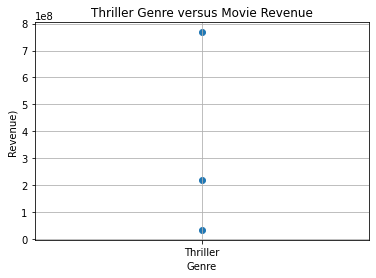

In [20]:
#scatter plot it

plt.scatter(thriller_df["genres"], thriller_df["revenue"], marker="o")

# Incorporate the other graph properties
plt.title("Thriller Genre versus Movie Revenue")
plt.ylabel("Revenue)")
plt.xlabel("Genre")
plt.grid(True)

# Save the figure
plt.savefig("thriller_revenue.png")

# Show plot
plt.show()